In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def f_true(x):
    return 0.03 * x ** 4 - 0.4 * x ** 2 + 0.7 * np.sin(2.2 * x)

def make_poly_features(x, degree):
    x = np.asarray(x).reshape(-1, 1)
    X = np.hstack([x ** i for i in range(degree + 1)])
    return X

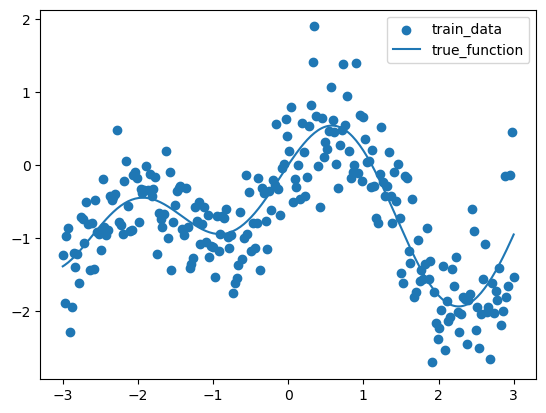

In [3]:
rng = np.random.default_rng(42)

N = 250
x = np.linspace(-3, 3, N)

sigma = 0.5
y = f_true(x) + rng.normal(0, sigma, size=x.shape)

degree = 15
X = make_poly_features(x, degree)

plt.scatter(x, y, label='train_data')
plt.plot(x, f_true(x), label='true_function')
plt.legend()
plt.show()

In [4]:
lamb = 1.0
alpha = 1.0 / (sigma ** 2)

M = X.shape[1]
posterior_cov_inv = lamb * np.eye(M) + alpha * (X.T @ X)

In [5]:
posterior_cov = np.linalg.inv(posterior_cov_inv)
mean = alpha * posterior_cov @ (X.T @ y)

In [6]:
x_new = np.linspace(-3, 3, 400)
X_new = make_poly_features(x_new, degree)

mean_pred = X_new @ mean
var_pred = 1.0 / alpha + np.sum(X_new @ posterior_cov @ X_new.T, axis=1)
std_pred = np.sqrt(var_pred)

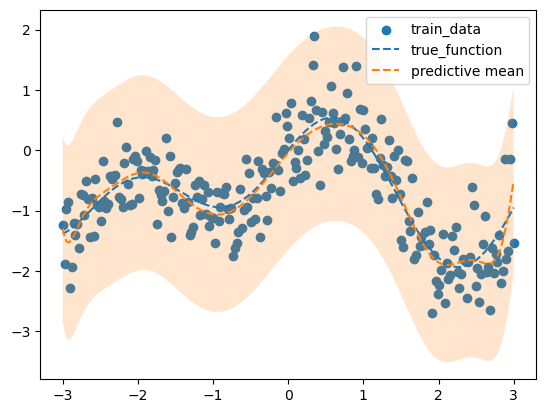

In [7]:
plt.scatter(x, y, label='train_data')
plt.plot(x_new, f_true(x_new), linestyle='--', label='true_function')
plt.plot(x_new, mean_pred, linestyle='--', label='predictive mean')

plt.fill_between(x_new, mean_pred - 2 * std_pred, mean_pred + 2 * std_pred, alpha=0.2)

plt.legend()
plt.show()

In [8]:
def log_evidence(lamb, X, y, alpha):
    '''
    Тут надо написать расчет log-evidence, через формулу, которая была в лекции
    Далее взять какой-то набор лямбд (например np.logspace(-6, 3, 160)) и оценить для каждой эту функцию
    Получится лучшая лябмда
    Вывести график log-evidence vs lambda + графики, чтобы визуально сравнить предсказания базовой модели и модели с лучшей лямбдой
    '''
    N = len(y)
    M = X.shape[1]
    A = lamb * np.eye(M) + alpha * X.T @ X
    A_inv = np.linalg.inv(A)
    m = alpha * A_inv @ (X.T @ y)
    E = (alpha / 2) * np.sum((y - X @ m)**2) + (lamb / 2) * np.dot(m, m)
    log_det_A = np.log(np.linalg.det(A))
    log_ev = (M / 2) * np.log(lamb) + (N / 2) * np.log(alpha) - E - (1 / 2) * log_det_A - (N / 2) * np.log(2 * np.pi)
    return log_ev

In [9]:
lambdas = np.logspace(-6, 3, 160)
alpha = 1 / (0.5 ** 2)
log_evs = []
for l in lambdas:
    log_evs.append(log_evidence(l, X, y, alpha))
log_evs = np.array(log_evs)
best_lamb_idx = np.argmax(log_evs)
best_lamb = lambdas[best_lamb_idx]
print(f"Best lambda: {best_lamb}")

Best lambda: 13.554249376408254


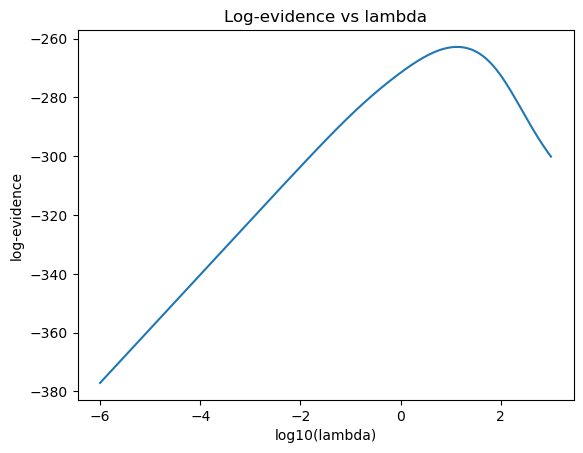

In [10]:
plt.plot(np.log10(lambdas), log_evs)
plt.xlabel('log10(lambda)')
plt.ylabel('log-evidence')
plt.title('Log-evidence vs lambda')
plt.show()

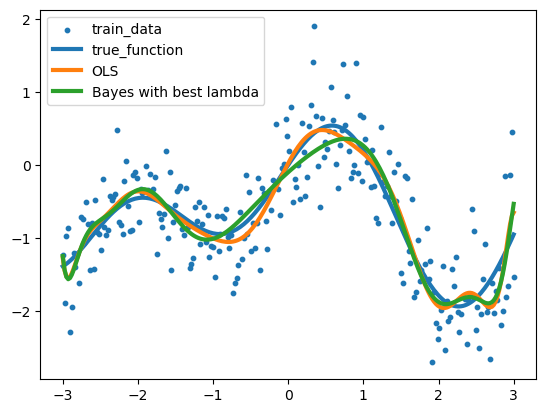

In [11]:
w_ols = np.linalg.pinv(X) @ y
y_ols = X @ w_ols

A_best = best_lamb * np.eye(X.shape[1]) + alpha * X.T @ X
A_best_inv = np.linalg.inv(A_best)
m_best = alpha * A_best_inv @ (X.T @ y)
y_bayes = X @ m_best

plt.scatter(x, y, label='train_data', s=10)
plt.plot(x, f_true(x), label='true_function', linewidth=3)
plt.plot(x, y_ols, label='OLS', linewidth=3)
plt.plot(x, y_bayes, label='Bayes with best lambda', linewidth=3)
plt.legend()
plt.show()